In [91]:
import numpy as np
import math as m
import statistics as S

In [97]:
np.random.seed(1)
def sim_stocks(S0, r,sigma,steps =252,T=1):
    nSims = 1000
    sim_steps = 20
    dt = 1/1000
    div = 0
    mu = (r-div-0.5*sigma*sigma)*dt
    sigma = sigma*m.sqrt(dt)
    St = np.zeros(shape=(sim_steps,nSims))
    St[0,] = S0
    for i in range(1,sim_steps):
            for j in range(0,nSims):
                e = np.random.randn(1)
                St[i,j] = St[i-1,j]*m.exp(mu+sigma*-e)
    return(St)

sim_stocks = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100,0.05,sigma=0.2,steps = 252,T=1)

In [93]:
import pandas as pd
print(pd.DataFrame(sim_stocks))

          0           1           2           3           4           5     \
0   100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1    99.227991   99.297529   98.558207   99.029857  101.272206  100.388324   
2   100.227855   96.639542   99.479886   97.163872  101.939355  100.343723   
3    99.178572   98.502502  100.885443   98.531697  101.951645  101.762880   
4    99.821635   97.980434  101.554387   98.883023  103.842528  102.501458   
5   100.967853   96.788627  102.079558   98.238359  103.007382  102.980598   
6   100.934509   97.540049  103.942529   96.852461  105.524823  106.183290   
7   101.749087   97.372716  102.693566   95.080991  106.874781  107.549413   
8   100.339531  100.281117  104.006235   95.383068  107.710419  109.502012   
9   101.121369  103.804833  104.408221   97.896908  107.770162  108.918235   
10  101.042140  104.463069  106.096929   96.215918  107.534720  110.878401   
11  101.794023  101.687231  105.981254   94.791661  107.635820  

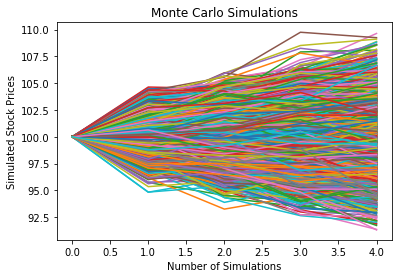

In [4]:
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(sim_stocks).head())
plt.title("Monte Carlo Simulations")
plt.xlabel("Number of Simulations")
plt.ylabel("Simulated Stock Prices")
plt.show()

In [96]:
K=100
r=0.05
T=1
Nt=T*252 #number of trading days until maturity
sim_stocks = pd.DataFrame(sim_stocks)
prices = []
Y = []
steps=252
sim_steps = 20
for i in range(0,sim_steps):
    prices.append(np.mean(sim_stocks [i])) # Taking the arithmetic mean
    Y.append(max(prices[i]-K,0)*m.exp(-r*T))
arithmetic_opt_price  = np.mean(Y)
error=S.stdev(Y)/m.sqrt(20)
print(arithmetic_opt_price,error)
Y

1.263768515165094 0.4956304256743728


[1.4644633177606643,
 0.6543142444366465,
 3.8391114402460085,
 0.0,
 3.752798823805248,
 7.055307238085846,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4034519010554916,
 0.0,
 0.0,
 6.459838692189652,
 0.0,
 0.6460846457223234,
 0.0,
 0.0,
 0.0]

In [102]:
np.random.seed(1)
def sim_stocks(S0, r,sigma,steps =252,T=1):
    nSims = 10000
    sim_steps = 20
    dt = 1/nSims
    div = 0
    mu = (r-div-0.5*sigma*sigma)*dt
    sigma = sigma*m.sqrt(dt)
    St = np.zeros(shape=(sim_steps,nSims))
    St[0,] = S0
    for i in range(1,sim_steps):
            for j in range(0,nSims):
                e = np.random.randn(1)
                St[i,j] = St[i-1,j]*m.exp(mu+sigma*e)
    return(St)

sim_stocks2 = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100,0.05,sigma=0.2,steps = 252,T=1)

In [105]:
K=110
r=0.05
T=1
Nt=T*252 #number of trading days until maturity
sim_stocks = pd.DataFrame(sim_stocks)
prices2 = []
Y2 = []
steps=252
sim_steps = 20
for i in range(0,sim_steps):
    prices2.append(np.mean(sim_stocks [i])) # Taking the arithmetic mean
    Y2.append(max(prices2[i]-K,0)*m.exp(-r*T))
arithmetic_opt_price2  = np.mean(Y2)
error2=S.stdev(Y2)/m.sqrt(10000)
print(arithmetic_opt_price2,error2)

0.0 0.0


In [27]:
Y3=0.5*np.array(Y2+Y)

In [28]:
#antithetic m20
arithmetic_opt_price3  = np.mean(Y3)
error3=S.stdev(Y3)/m.sqrt(10000)
print(arithmetic_opt_price3,error3)

0.71246824893023 0.009768883016535947


In [29]:
np.random.seed(1)
def sim_stocks(S0, r,sigma,steps =252,T=1):
    nSims = 10000
    sim_steps = 50
    dt = 1/steps
    div = 0
    mu = (r-div-0.5*sigma*sigma)*dt
    sigma = sigma*m.sqrt(dt)
    St = np.zeros(shape=(sim_steps,nSims))
    St[0,] = S0
    for i in range(1,sim_steps):
            for j in range(0,nSims):
                e = np.random.randn(1)
                St[i,j] = St[i-1,j]*m.exp(mu+sigma*-e)
    return(St)

sim_stocks = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100,0.05,sigma=0.2,steps = 252,T=1)

In [30]:
K=100
r=0.05
T=1
Nt=T*252 #number of trading days until maturity
sim_stocks = pd.DataFrame(sim_stocks)
prices = []
Y = []
steps=252
sim_steps = 50
for i in range(0,sim_steps):
    prices.append(np.mean(sim_stocks [i])) # Taking the arithmetic mean
    Y.append(max(prices[i]-K,0)*m.exp(-r*T))
arithmetic_opt_price  = np.mean(Y)
error=S.stdev(Y)/m.sqrt(10000)
print(arithmetic_opt_price,error)

2.3527950773050867 0.0355020518011071


In [31]:
np.random.seed(1)
def sim_stocks(S0, r,sigma,steps =252,T=1):
    nSims = 10000
    sim_steps = 50
    dt = 1/steps
    div = 0
    mu = (r-div-0.5*sigma*sigma)*dt
    sigma = sigma*m.sqrt(dt)
    St = np.zeros(shape=(sim_steps,nSims))
    St[0,] = S0
    for i in range(1,sim_steps):
            for j in range(0,nSims):
                e = np.random.randn(1)
                St[i,j] = St[i-1,j]*m.exp(mu+sigma*e)
    return(St)

sim_stocks = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100,0.05,sigma=0.2,steps = 252,T=1)

In [32]:
K=100
r=0.05
T=1
Nt=T*252 #number of trading days until maturity
sim_stocks = pd.DataFrame(sim_stocks)
prices2 = []
Y2 = []
steps=252
sim_steps = 50
for i in range(0,sim_steps):
    prices2.append(np.mean(sim_stocks [i])) # Taking the arithmetic mean
    Y2.append(max(prices2[i]-K,0)*m.exp(-r*T))
arithmetic_opt_price2  = np.mean(Y2)
error2=S.stdev(Y2)/m.sqrt(10000)
print(arithmetic_opt_price2,error2)

1.7815538195210896 0.026441546906877014


In [33]:
Y3=0.5*np.array(Y2+Y)

In [34]:
#antithetic m50
arithmetic_opt_price3  = np.mean(Y3)
error3=S.stdev(Y3)/m.sqrt(10000)
print(arithmetic_opt_price3,error3)

1.033587224206544 0.01563744814018345


In [101]:
np.random.seed(1)
def sim_stocks(S0, r,sigma,steps =252,T=1):
    nSims = 10000
    sim_steps = 20
    dt = 1/nSims 
    div = 0
    mu = (r-div-0.5*sigma*sigma)*dt
    sigma = sigma*m.sqrt(dt)
    St = np.zeros(shape=(sim_steps,nSims))
    St[0,] = S0
    for i in range(1,sim_steps):
            for j in range(0,nSims):
                e = np.random.randn(1)
                St[i,j] = St[i-1,j]*m.exp(mu+sigma*-e)
    return(St)

sim_stocks = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100,0.05,sigma=0.2,steps = 252,T=1)
K=110
r=0.05
T=1
Nt=T*252 #number of trading days until maturity
sim_stocks = pd.DataFrame(sim_stocks)
prices = []
Y = []
steps=252
sim_steps = 20
for i in range(0,sim_steps):
    prices.append(np.mean(sim_stocks [i])) # Taking the arithmetic mean
    Y.append(max(prices[i]-K,0)*m.exp(-r*T))
arithmetic_opt_price  = np.mean(Y)
error=S.stdev(Y)/m.sqrt(10000)
print(arithmetic_opt_price,error)

0.0 0.0


In [88]:
np.random.seed(1)
def sim_stocks(S0, r,sigma,steps =252,T=1):
    nSims = 10000
    sim_steps = 20
    dt = 1/steps
    div = 0
    mu = (r-div-0.5*sigma*sigma)*dt
    sigma = sigma*m.sqrt(dt)
    St = np.zeros(shape=(sim_steps,nSims))
    St[0,] = S0
    for i in range(1,sim_steps):
            for j in range(0,nSims):
                e = np.random.randn(1)
                St[i,j] = St[i-1,j]*m.exp(mu+sigma*e)
    return(St)

sim_stocks = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100,0.05,sigma=0.2,steps = 252,T=1)
K=110
r=0.05
T=1
Nt=T*252 #number of trading days until maturity
sim_stocks = pd.DataFrame(sim_stocks)
prices2 = []
Y2 = []
steps=252
sim_steps = 20
for i in range(0,sim_steps):
    prices2.append(np.mean(sim_stocks [i])) # Taking the arithmetic mean
    Y2.append(max(prices2[i]-K,0)*m.exp(-r*T))
arithmetic_opt_price2  = np.mean(Y2)
error2=S.stdev(Y2)/m.sqrt(10000)
print(arithmetic_opt_price2,error2)

0.0 0.0


In [89]:
#antithetic m100
Y3=0.5*np.array(Y2+Y)
arithmetic_opt_price3  = np.mean(Y3)
error3=S.stdev(Y3)/m.sqrt(10000)
print(arithmetic_opt_price3,error3)

0.0 0.0


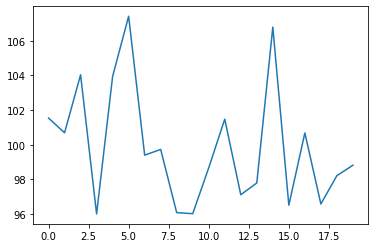

In [99]:
plt.plot(prices)

In [100]:
prices

[101.53954795766472,
 100.68786165312336,
 104.03594689289716,
 96.00496962442648,
 103.9452089339804,
 107.4170405754522,
 99.3987784210408,
 99.72686743216869,
 96.07978903430748,
 96.0182958582206,
 98.6677987162051,
 101.47540841873362,
 97.11338084370901,
 97.79166961069832,
 106.79104170435048,
 96.50764059826616,
 100.67921011386022,
 96.57915238736898,
 98.21295979880003,
 98.81567613994551]